A ideia é te deixar bem livre para criar as combinações e fazer as análises que quiser, desde que você consiga responder:

- Qual nosso melhor canal de aquisição?
- Existe algum padrão de comportamento em algum grupo de leitores?
- Quais medidas podemos tomar como empresa, com base nos dados analisados por você.

In [83]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_json('DataSetTheNews.json')

In [21]:
df

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel
0,Chaddy,Smithe,csmithe0@census.gov,2022-01-24,2021-09-23,0.88,the news,GoogleAds
1,Shir,Halloran,shalloran1@narod.ru,2021-10-07,2022-02-01,0.02,the bizness,Referral
2,Gusti,Schwanden,gschwanden2@feedburner.com,2022-01-05,2021-04-08,0.81,the champs,Referral
3,Ted,Kettles,tkettles3@noaa.gov,2022-05-15,2022-03-15,0.20,the bizness,Referral
4,Virginia,Glencorse,vglencorse4@redcross.org,2022-06-26,2022-02-22,0.99,the news,Referral
...,...,...,...,...,...,...,...,...
995,Ashla,Boulds,abouldsrn@army.mil,2021-01-09,2022-05-06,0.96,the champs,Facebook
996,Manya,Sainthill,msainthillro@wikia.com,2022-01-27,2022-05-05,0.93,the news,Organic
997,None,Fergusson,None,2021-08-23,2022-02-17,0.76,the news,Referral
998,Dianna,Beardsell,dbeardsellrq@nih.gov,2022-06-24,2022-06-27,0.70,the bizness,Insta


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_name     973 non-null    object 
 1   last_name      939 non-null    object 
 2   email          973 non-null    object 
 3   Entry Date     939 non-null    object 
 4   Last Opened    939 non-null    object 
 5   Open Rate      939 non-null    float64
 6   Newsletter     939 non-null    object 
 7   Entry Channel  939 non-null    object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [16]:
df['Entry Date'] = pd.to_datetime(df['Entry Date'])
df['Last Opened'] = pd.to_datetime(df['Last Opened'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   first_name     973 non-null    object        
 1   last_name      939 non-null    object        
 2   email          973 non-null    object        
 3   Entry Date     939 non-null    datetime64[ns]
 4   Last Opened    939 non-null    datetime64[ns]
 5   Open Rate      939 non-null    float64       
 6   Newsletter     939 non-null    object        
 7   Entry Channel  939 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 62.6+ KB


In [25]:
df.isnull().sum()

first_name       27
last_name        61
email            27
Entry Date       61
Last Opened      61
Open Rate         0
Newsletter       61
Entry Channel    61
dtype: int64

In [24]:
df['Open Rate'].fillna(value=df['Open Rate'].median(), inplace=True)

In [5]:
df['Newsletter'].unique()

array(['the news', 'the bizness', 'the champs', None, 'the stories'],
      dtype=object)

In [27]:
df['Entry Channel'].unique()

array(['GoogleAds', 'Referral', 'Organic', None, 'Insta', 'Influencer',
       'Facebook'], dtype=object)

In [28]:
df['Entry Channel'].value_counts()

Facebook      169
Referral      163
GoogleAds     158
Influencer    157
Organic       156
Insta         136
Name: Entry Channel, dtype: int64

In [63]:
df.sample(3)

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel
599,Cynthia,Preddy,cpreddygn@wired.com,2021-12-11,2022-03-20,0.33,the news,Organic
971,Anton,None,afassmannqz@engadget.com,NaT,NaT,0.50,None,None
148,Tobe,Pedgrift,tpedgrift44@wikispaces.com,2022-12-03,2021-09-25,0.40,the bizness,Referral


In [87]:
plt.figure(figsize=(5,5))
label = df['Entry Channel'].value_counts().index
label_count = df['Entry Channel'].value_counts().values
fig = px.pie(df, values=label_count, names=label, title='Canais de entrada')
fig.show()

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Leitores')

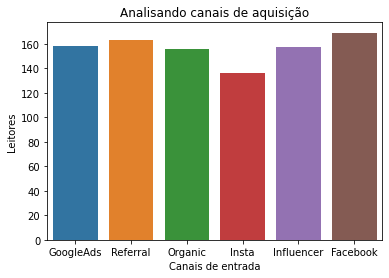

In [80]:
sns.countplot(x=df['Entry Channel'], data=df)
plt.title('Analisando canais de aquisição')
plt.xlabel('Canais de entrada')
plt.ylabel('Leitores')

Baseado nos gráficos acima, o método de divulgação com mais resultados é o Facebook, seguido pelo método de referências, o que indica que os sorteios estão tendo resultados diretos na frequência do público com o Dênius.

In [92]:
# df['Last Opened'] - df['Entry Date']

0     -123 days
1      117 days
2     -272 days
3      -61 days
4     -124 days
         ...   
995    482 days
996     98 days
997    178 days
998      3 days
999   -253 days
Length: 1000, dtype: timedelta64[ns]

<AxesSubplot:xlabel='Newsletter', ylabel='Open Rate'>

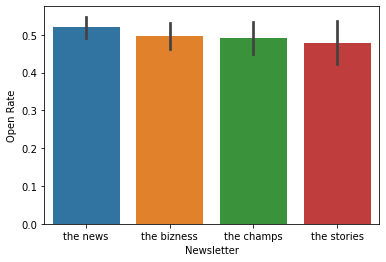

In [102]:
sns.barplot(x=df['Newsletter'], y=df['Open Rate'], data=df)

De acordo com o gráfico acima a taxa de leitura do "the news" é levemente maior entre os leitores, seguido pelo "the biziness", "the champs" e finalmente o "the stories", chegando em media a 50%

<AxesSubplot:xlabel='Newsletter', ylabel='Open Rate'>

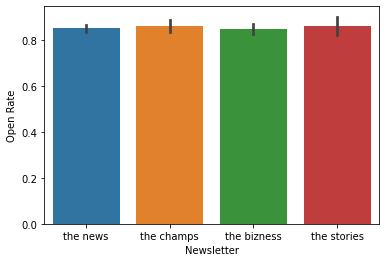

In [122]:
df1 = df[df['Open Rate'] > 0.7]
sns.barplot(x=df1['Newsletter'], y=df1['Open Rate'], data=df1)

Entre as taxas de abertura com maior frequência (mais que 70%), os canais de Newsletter estão bem equilibrados.